### BRIEF LABYRINTHE

 L'algorithme dfs met --- 3.981590270996094e-05 seconds --- pour s'exécuter
Insérer la largeur du Labyrinthe : 12
Insérer la hauteur du Labyrinthe : 12


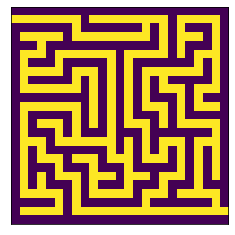

{(0, 0): None,
 (0, 1): (0, 0),
 (0, 2): (0, 1),
 (0, 3): (0, 2),
 (0, 4): (0, 3),
 (0, 5): (0, 4),
 (0, 6): (0, 5),
 (0, 7): (0, 6),
 (0, 8): (0, 7),
 (1, 8): (0, 8),
 (1, 7): (1, 8),
 (1, 6): (1, 7),
 (1, 5): (1, 6),
 (2, 5): (1, 5),
 (2, 4): (2, 5),
 (3, 4): (2, 4),
 (4, 4): (3, 4),
 (4, 5): (4, 4),
 (5, 5): (4, 5),
 (5, 6): (5, 5),
 (4, 6): (5, 6),
 (3, 6): (4, 6),
 (2, 6): (3, 6),
 (2, 7): (2, 6),
 (2, 8): (2, 7),
 (3, 8): (2, 8),
 (3, 7): (3, 8),
 (4, 7): (3, 7),
 (5, 7): (4, 7),
 (6, 7): (5, 7),
 (6, 6): (6, 7),
 (6, 5): (6, 6),
 (6, 4): (6, 5),
 (6, 3): (6, 4),
 (7, 3): (6, 3),
 (8, 3): (7, 3),
 (8, 2): (8, 3),
 (9, 2): (8, 2),
 (9, 1): (9, 2),
 (9, 0): (9, 1),
 (8, 0): (9, 0),
 (7, 0): (8, 0),
 (6, 0): (7, 0),
 (6, 1): (6, 0),
 (5, 1): (6, 1),
 (4, 1): (5, 1),
 (3, 1): (4, 1),
 (2, 1): (3, 1),
 (1, 1): (2, 1),
 (1, 0): (1, 1),
 (2, 0): (1, 0),
 (3, 0): (2, 0),
 (4, 0): (3, 0),
 (5, 0): (4, 0),
 (1, 2): (1, 1),
 (2, 2): (1, 2),
 (2, 3): (2, 2),
 (3, 3): (2, 3),
 (3, 2): (3, 3),

In [3]:
import random
import matplotlib.pyplot as plt
import time

start_time = time.time()
print(" L'algorithme dfs met --- %s seconds --- pour s'exécuter" % (time.time() - start_time))

class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant



class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None


    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0


    def lireSommet(self):
        return self.sommet.valeur



# Dimensions de la grille:
LARGEUR = int(input("Insérer la largeur du Labyrinthe : "))
HAUTEUR = int(input("Insérer la hauteur du Labyrinthe : "))



#Largeur 20
#Hauteur 15




def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
    return listeVoisins




def dfs(s) :
    P = {s: None}
    Q = Pile()
    Q.empiler(s)
    while not(Q.estVide()) :
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.empiler(v)
        else :
            Q.depiler()
    return P




def dedale():
    """
    Fonction dessinant le résultat
    """
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
    parcours = dfs((0,0))

    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 1
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1

    labyrinthe[1][0] = 1
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 1

    # le graphique:
    plt.imshow(labyrinthe)
    # on cache les graduations:
    plt.xticks([])
    plt.yticks([])
    # on visualise le résultat:
    plt.show()



dedale()
dfs((0,0))

### CALCUL DU CHEMIN LE PLUS COURT D'UN GRAPHE AVEC L'ALGO BFS

In [4]:


graph = {
    (0,4):[(1,4)],
    (1,4):[(0,4),(2,4)],
    (2,4):[(1,4),(2,3),(3,4)],
    (2,3):[(2,4),(2,2),(3,3)],
    (2,2):[(2,3),(1,2),(3,2)],
    (1,2):[(2,2),(1,3)],
    (1,3):[(1,2),(0,3)],
    (0,3):[(1,3),(0,2)],
    (0,2):[(0,3)],
    (3,2):[(2,2),(3,1)],
    (3,1):[(3,2),(4,1),(2,1)],
    (2,1):[(3,1),(2,0),(1,1)],
    (1,1):[(2,1),(1,0)],
    (1,0):[(1,1),(0,0)],
    (0,0):[(1,0),(0,1)],
    (0,1):[(0,0)],
    (2,0):[(2,1),(3,0)],
    (3,0):[(2,0),(4,0)],
    (4,0):[(3,0)],
    (4,1):[(3,1)],
    (3,3):[(2,3)],    
    (3,4):[(2,4),(4,4)],
    (4,4):[(3,4),(4,3)],
    (4,3):[(4,4),(4,2)],
    (4,2):[(4,3),(5,2)],
    (5,2):[(4,2),(5,3)],
    (5,3):[(5,2),(5,4)],
    (5,4):[(5,3)],
    (5,1):[(5,2),(5,0)],
    (5,0):[(5,1)]    
}


visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        
        


# Driver Code
bfs(visited, graph, (0,4))

(0, 4) (1, 4) (2, 4) (2, 3) (3, 4) (2, 2) (3, 3) (4, 4) (1, 2) (3, 2) (4, 3) (1, 3) (3, 1) (4, 2) (0, 3) (4, 1) (2, 1) (5, 2) (0, 2) (2, 0) (1, 1) (5, 3) (3, 0) (1, 0) (5, 4) (4, 0) (0, 0) (0, 1) 